# Paquetes

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos y separación en sets de entrenamiento y prueba

In [126]:
df=np.load("proyecto_training_data.npy")
df

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [127]:
train=df[0:int(len(df)*.8)]

In [128]:
test=df[int(len(df)*.8):len(df)+1]

In [129]:
len(train)

1168

In [130]:
len(test)

292

# Ánalisis exploratorio

In [131]:
columnas=["SalePrice","Quality","1stFloor","Rooms","YearBuilt","LotFrontage"]

SalePrice:
Media: 180590.28
Máximo: 755000.0
Mínimo: 34900.0
Rango: 720100.0
Desviación estándar: 78781.95


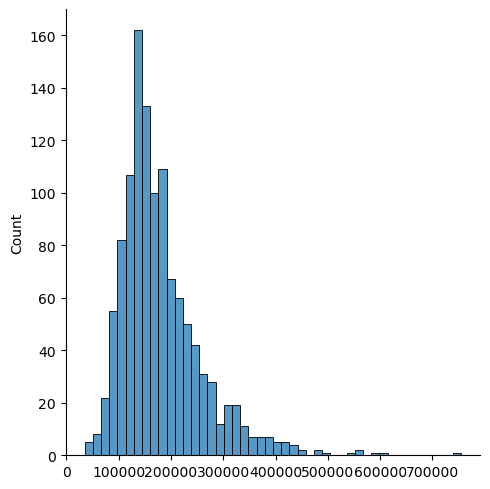


Quality:
Media: 6.1
Máximo: 10.0
Mínimo: 1.0
Rango: 9.0
Desviación estándar: 1.38


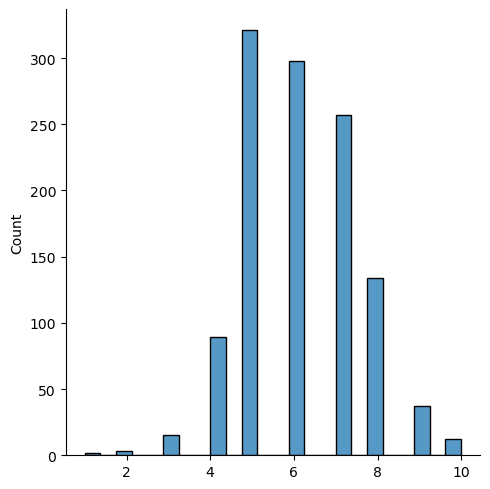


1stFloor:
Media: 1156.32
Máximo: 3228.0
Mínimo: 334.0
Rango: 2894.0
Desviación estándar: 373.62


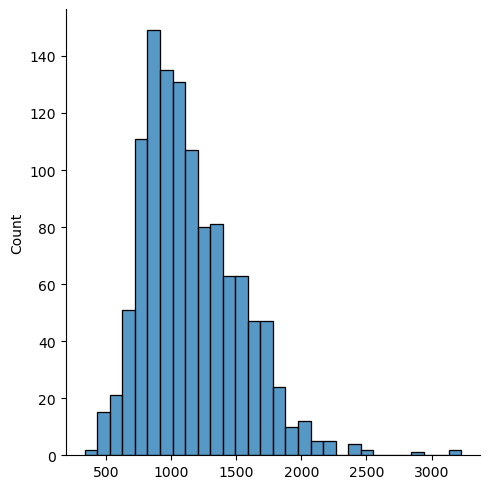


Rooms:
Media: 6.49
Máximo: 14.0
Mínimo: 2.0
Rango: 12.0
Desviación estándar: 1.61


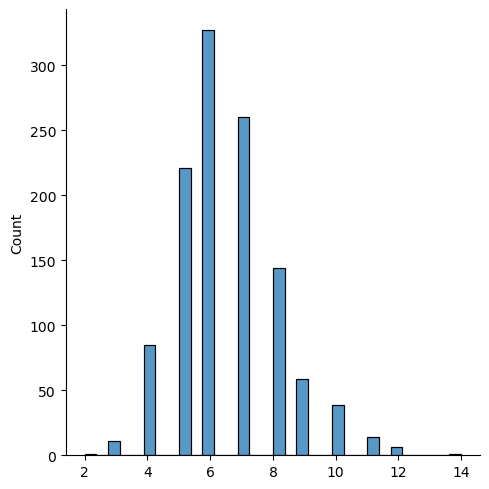


YearBuilt:
Media: 1971.45
Máximo: 2010.0
Mínimo: 1875.0
Rango: 135.0
Desviación estándar: 29.94


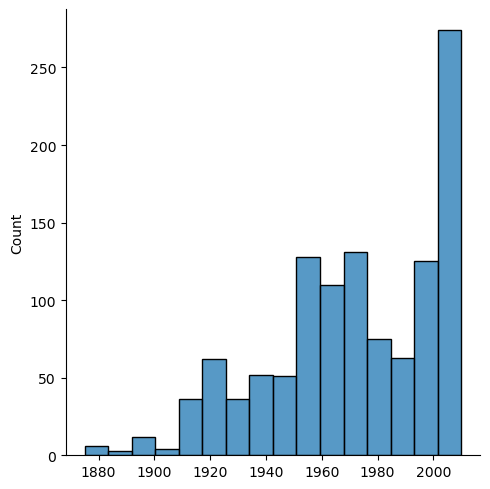


LotFrontage:
Media: 69.95
Máximo: 313.0
Mínimo: 21.0
Rango: 292.0
Desviación estándar: 23.47


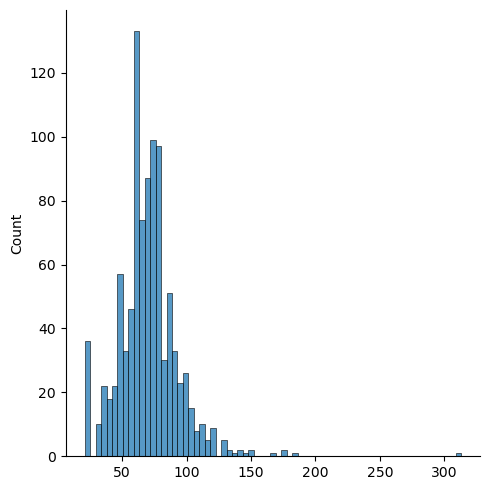

In [132]:
for i in range(0,len(columnas)):
    print(columnas[i]+":")
    print("Media:",round(np.nanmean(train[:,i]),2))
    print("Máximo:",round(np.nanmax(train[:,i]),2))
    print("Mínimo:",round(np.nanmin(train[:,i]),2))
    print("Rango:",round(np.nanmax(train[:,i]),2)-round(np.nanmin(train[:,i]),2))
    print("Desviación estándar:",round(np.nanstd(train[:,i]),2))
    sns.displot(train[:,i])
    plt.show()
    print("")

# Correlación entre precio y predictoras

In [236]:
train_df=pd.DataFrame(train, columns=columnas)
test_df=pd.DataFrame(test, columns=columnas)

In [134]:
train_corr=train_df.corr()

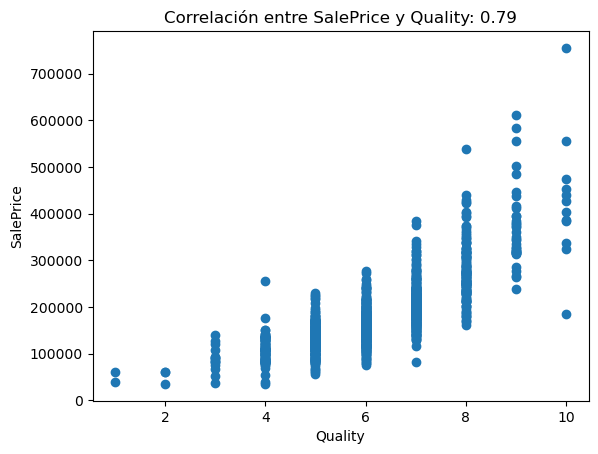

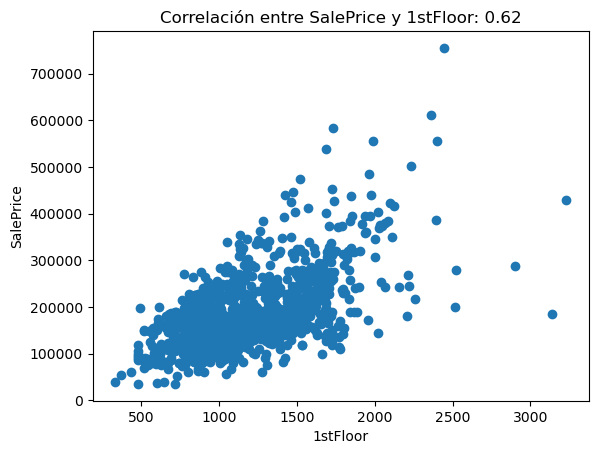

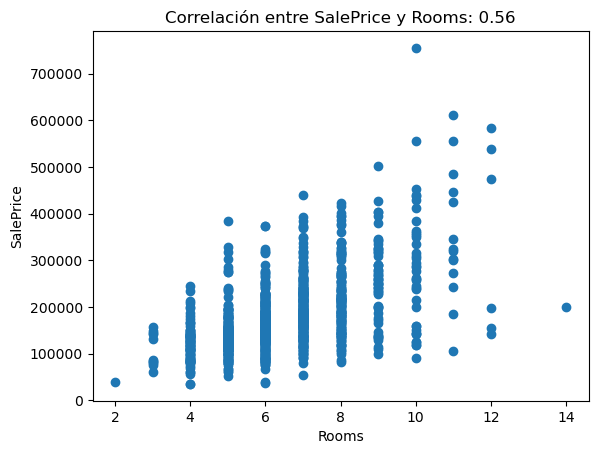

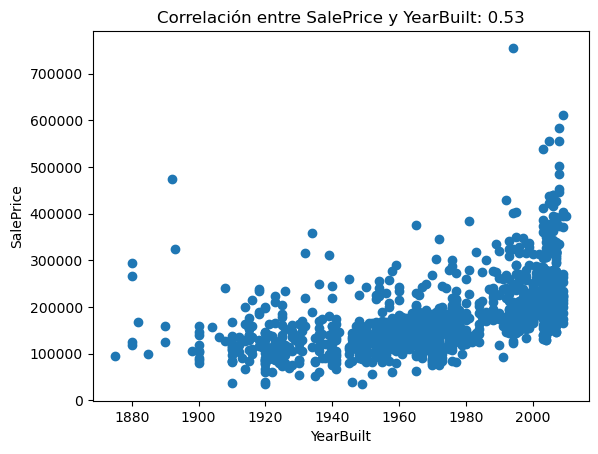

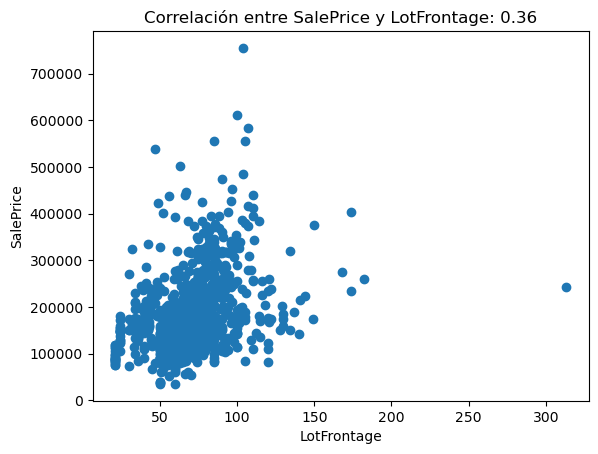

In [11]:
for i in columnas[1:]:
    plt.scatter(train_df[i], train_df["SalePrice"])
    plt.xlabel(i)
    plt.ylabel("SalePrice")
    plt.title("Correlación entre SalePrice y "+i+": "+str(round(train_corr["SalePrice"].loc[i],2)))
    plt.show()


Las dos variables con mayor poder predictivo son Quality y 1stFloor.

# Modelo de regresión lineal

In [142]:
def regresion(x,y,epochs,imprimir_error_cada,learning_rate):
    matriz=np.column_stack([x, np.ones(len(x))])
    #beta1 en la columna 0 y beta0 en la columna 1
    betas=np.array([0,0])
    dict_modelos=dict()
    errores=[]
    for i in range(0, epochs):
        yhat=np.dot(matriz, betas)
        error=sum((y-yhat)**2)/(2*len(y))
        errores.append(error)
        gradiente=np.dot((yhat-y),matriz)/len(y)
        dict_modelos[i]=[betas, yhat, x, y]
        betas=betas-learning_rate*gradiente
        try:
            if i%imprimir_error_cada==0 and i!=0:
                print ("Error de la iteración",str(i)+":",str(error))
        except ZeroDivisionError:
            pass
    return dict_modelos, errores

In [98]:
def grafica_errores(errores):
    plt.scatter(range(len(errores)), errores)
    plt.xlabel("Iteraciones")
    plt.ylabel("Error")
    plt.title("Error del modelo")
    plt.show()

In [214]:
colores = [
    '#FF5733',  # orange
    '#33FF57',  # lime
    '#5733FF',  # indigo
    '#33FFF9',  # aqua
    '#FF33F9',  # fuchsia
    '#F933FF',  # purple
    '#33FF70',  # springgreen
    '#FF5733',  # tomato
    '#33FF7A',  # turquoise
    '#FF337A',  # orchid
    '#FF3337',  # coral
    '#3337FF',  # blueviolet
    '#33FF33',  # limegreen
    '#FFA933',  # gold
    '#33FFA9',  # cyan
    '#B433FF',  # violet
    '#FF33A9',  # hotpink
    '#33A9FF',  # deepskyblue
    '#A933FF',  # darkorchid
    '#FF3398',  # deeppink
    '#3398FF',  # dodgerblue
    '#FF3398',  # crimson
    '#3398FF',  # cornflowerblue
    '#FF3333',  # red
    '#33FF33',  # green
    '#3333FF',  # blue
    '#FFFF33',  # yellow
    '#33FFFF',  # cyan
    '#FF33FF',  # magenta
    '#FF5733',  # orange
    '#33FF57',  # lime
    '#5733FF',  # indigo
    '#33FFF9',  # aqua
    '#FF33F9',  # fuchsia
    '#F933FF',  # purple
    '#33FF70',  # springgreen
    '#FF5733',  # tomato
    '#33FF7A',  # turquoise
    '#FF337A',  # orchid
    '#FF3337',  # coral
    '#3337FF',  # blueviolet
    '#33FF33',  # limegreen
    '#FFA933',  # gold
    '#33FFA9',  # cyan
    '#B433FF',  # violet
    '#FF33A9',  # hotpink
    '#33A9FF',  # deepskyblue
    '#A933FF',  # darkorchid
    '#FF3398',  # deeppink
    '#3398FF',  # dodgerblue
    '#FF3398',  # crimson
    '#3398FF',  # cornflowerblue
]


def grafica_modelos(modelos, n):
    x=modelos[0][2]
    y=modelos[0][3]
    plt.scatter(x, y)
    for i in modelos:
        if i%n==0 and i!=0:
            yhat=modelos[i][1]
            plt.plot(x, yhat, color=colores[int(i/n)], label=('Modelo'+" "+str(i)))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

# Entrenamiento con Quality y 1stFloor

## Quality

In [179]:
modelos_quality, errores_quality=regresion(train_df["Quality"], train_df["SalePrice"],10000,0,.0499)

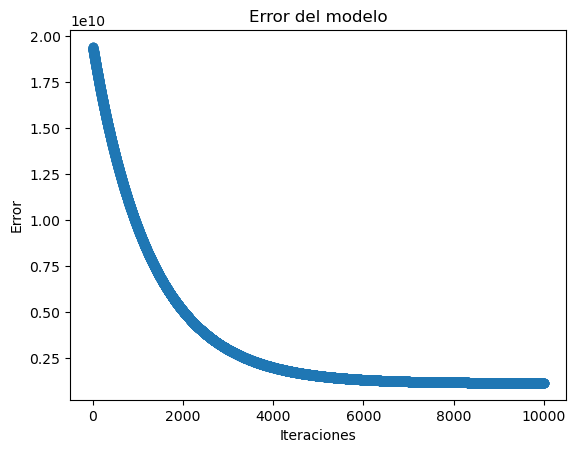

In [181]:
grafica_errores(errores_quality)

El error no disminuye considerablemente luego de 8000 iteraciones, entonces se entrenará con 8000.

In [242]:
modelos_quality, errores_quality=regresion(train_df["Quality"], train_df["SalePrice"],8000,0,.0499)

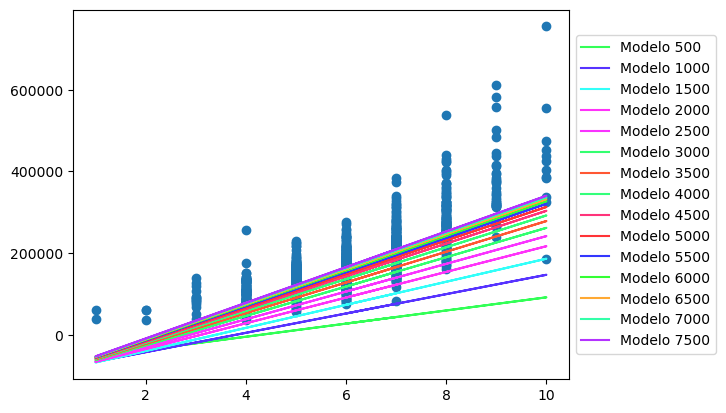

In [243]:
grafica_modelos(modelos_quality, 500)

## 1stFloor

In [207]:
modelos_1f, errores_1f=regresion(train_df["1stFloor"], train_df["SalePrice"],100,0,.000001)

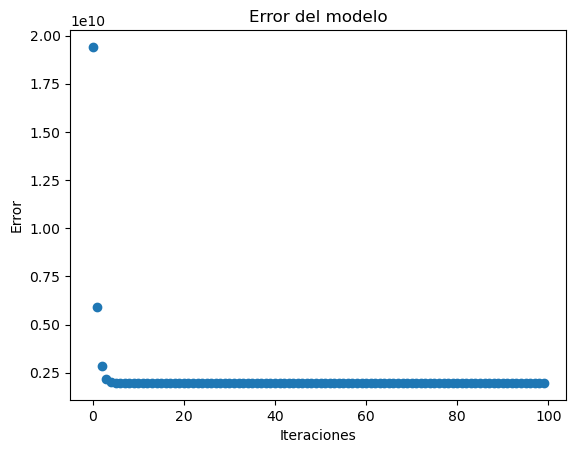

In [208]:
grafica_errores(errores_1f)

El error no disminuye considerablemente luego de 10 iteraciones, entonces se entrenará con 10.

In [211]:
modelos_1f, errores_1f=regresion(train_df["1stFloor"], train_df["SalePrice"],10,0,.000001)

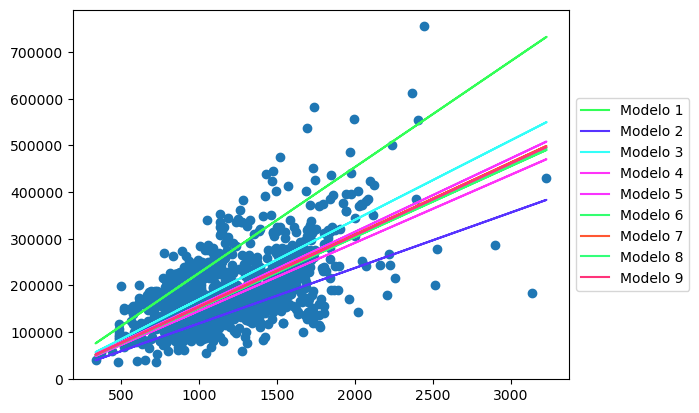

In [212]:
grafica_modelos(modelos_1f, 1)

In [233]:
from sklearn.linear_model import LinearRegression
skQuality = LinearRegression().fit(train_df[["Quality"]], train_df["SalePrice"])
sk1f=LinearRegression().fit(train_df[["1stFloor"]], train_df["SalePrice"])

In [262]:
def predicciones(x,modeloM, modeloSK):
    betas=modeloM[list(modeloM)[-1]][0]
    matriz=np.column_stack([x, np.ones(len(x))])
    prediccion_manual=np.dot(matriz, betas)
    
    prediccion_sklearn=modeloSK.predict(x)
    
    prediccion_promedio=(prediccion_manual + prediccion_sklearn)/2
    
    return prediccion_manual, prediccion_sklearn, prediccion_promedio

In [264]:
pred_manual_quality, pred_sklearn_quality, pred_promedio_quality=predicciones(test_df[["Quality"]], modelos_quality, skQuality)

In [267]:
def errores(y, pred_manual, pred_sklearn, pred_promedio):
    errores=[]
    for i in [pred_manual, pred_sklearn, pred_promedio]:
        error=sum((y-i)**2)/(2*len(y))
        errores.append(error)
    return errores

In [268]:
errores(test_df["Quality"], pred_manual_quality, pred_sklearn_quality, pred_promedio_quality)

[20005875539.67962, 18263813641.652443, 19124791681.049538]